### Apertura File

In [2]:
import pandas as pd

points = pd.read_csv('Dataset/constructor_standings.csv')
results = pd.read_csv('Dataset/results.csv')
constructors = pd.read_csv('Dataset/constructors.csv')
drivers = pd.read_csv('Dataset/drivers.csv')
races = pd.read_csv('Dataset/races.csv')
circuits = pd.read_csv('Dataset/circuits.csv')

year = 2023

In [3]:
### Librerie
import matplotlib.pyplot as plt
import fastf1.plotting as f1plt
import numpy as np
import matplotlib as mpl

# Introduzione
### Chi ha vinto più GP in F1?

In [4]:
### Gestione Grafici

f1plt.setup_mpl()

plt.rc('figure', figsize=(15.0, 10.0))

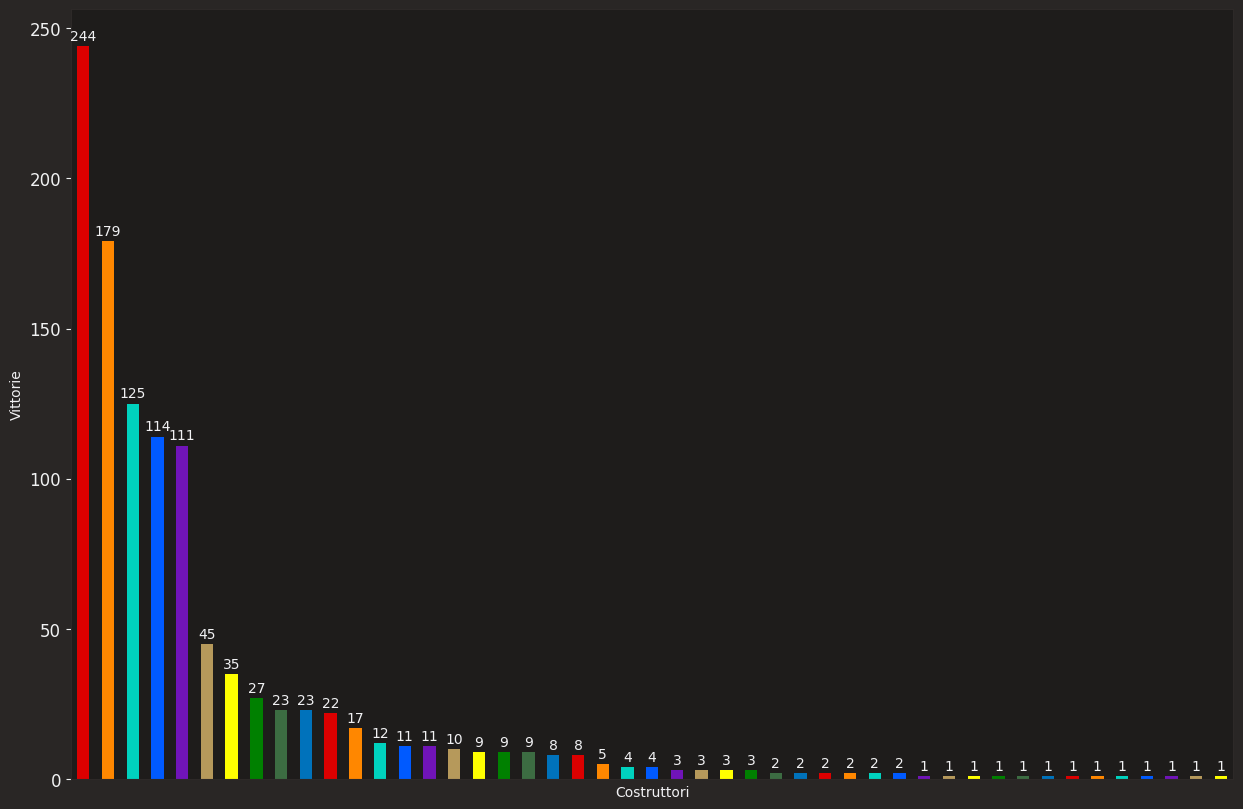

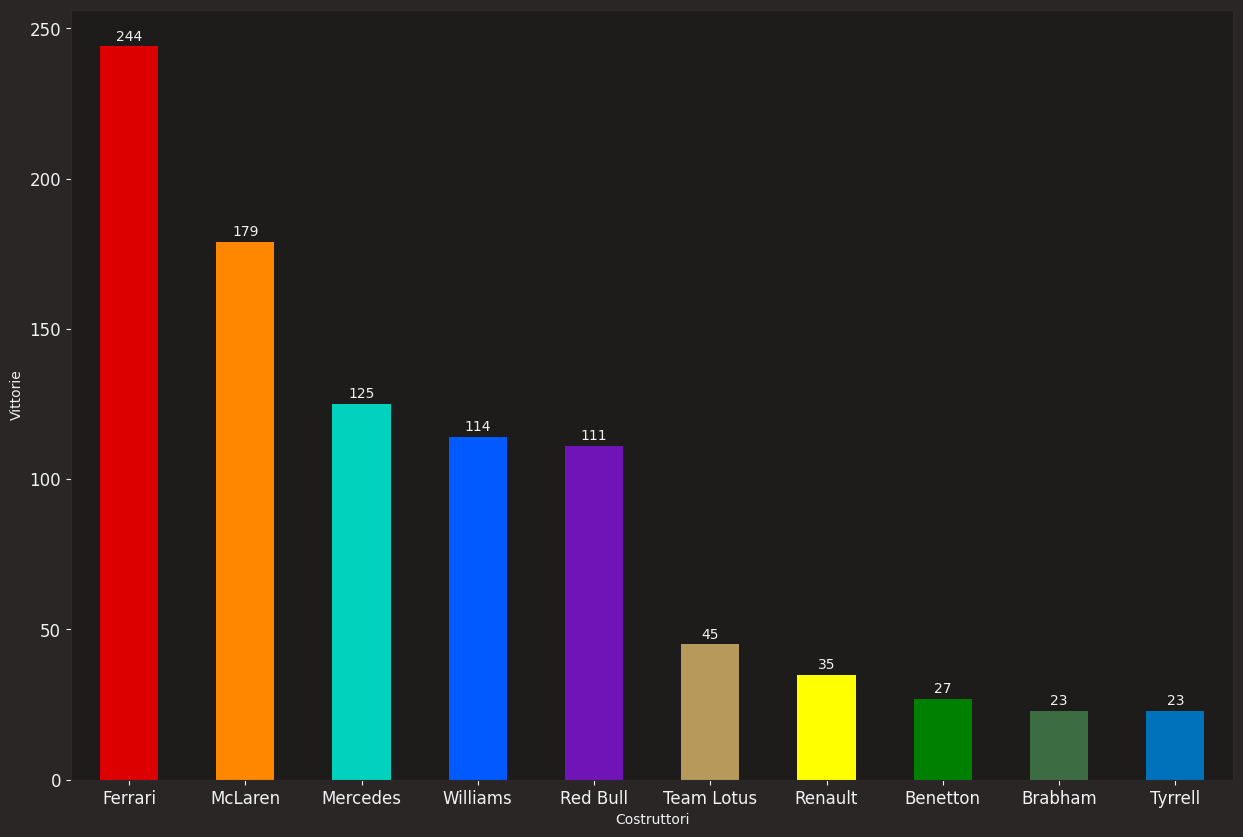

In [21]:
# Gestione Grafico
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

c_wins = results[results['positionOrder']==1].merge(constructors, on = 'constructorId')

colorStyle = [
    # I colori andrebbero scelti DOPO la generazione del grafico, in modo dipendente ai team dei primi 10
    f1plt.team_color('Fer'), # Ferrari
    f1plt.team_color('Mcl'), # McLaren
    f1plt.team_color('Mer'), # Mercedes
    f1plt.team_color('Wil'), # Williams
    '#7014b8', # Red Bull
    '#B6995B', # Lotus
    '#ffff00', # Renault
    '#008000', # Benetton
    '#3c6c42', # Brabham
    '#0072bb', # Tyrrell
]

c_wins['name'].value_counts().plot.bar(color = colorStyle)

# Aggiungiamo i numeri sopra le barre
for i, v in enumerate(c_wins['name'].value_counts()):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.xlabel('Costruttori')
plt.ylabel('Vittorie')
plt.xticks([])
plt.show()

c_wins['name'].value_counts()[:10].plot.bar(color = colorStyle)
# Aggiungiamo i numeri sopra le barre
for i, v in enumerate(c_wins['name'].value_counts()[:10]):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.xticks(rotation=0)
plt.xlabel('Costruttori')
plt.ylabel('Vittorie')
plt.show()

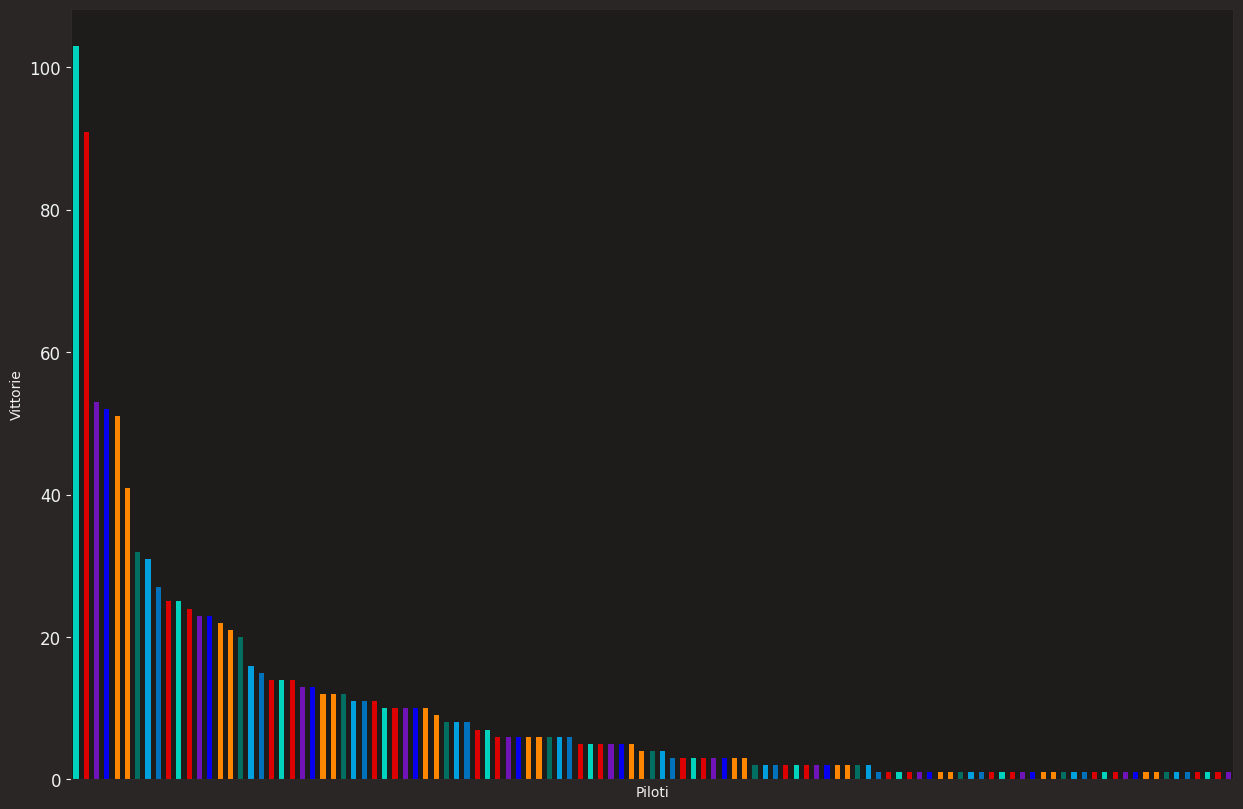

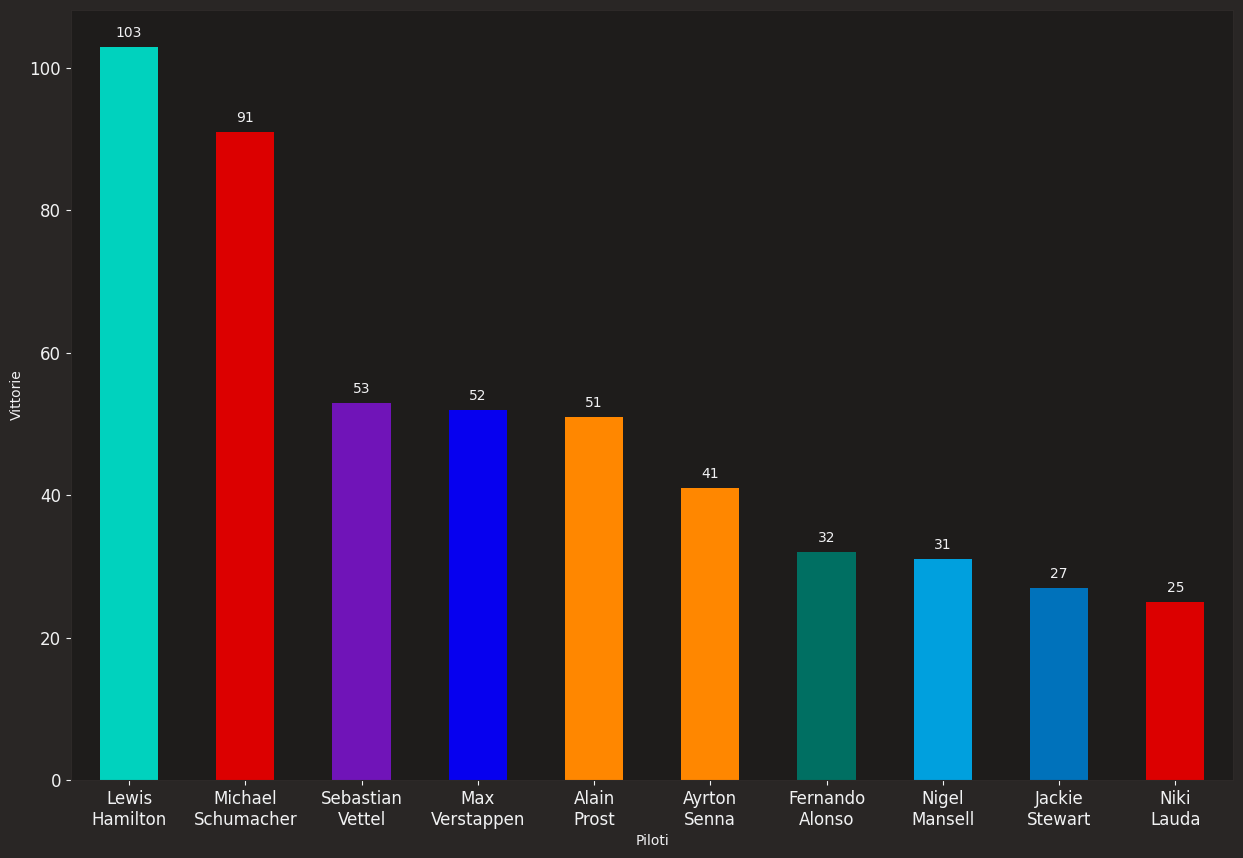

In [20]:
# Gestione Grafico
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

d_wins = results[results['positionOrder']==1].merge(drivers, on = 'driverId')
complete_name = d_wins['forename'] + '\n' + d_wins['surname']
d_wins['complete_name'] = complete_name

colorStyle = [
    # I colori andrebbero scelti DOPO la generazione del grafico, in modo dipendente ai team dei primi 10
    f1plt.driver_color('Ham'), # Hamilton (Mercedes 2023)
    f1plt.team_color('Fer'), # Schumacher (Ferrari 2004)
    '#7014b8', # Vettel (Red Bull 2013)
    f1plt.driver_color('Ver'), # Verstappen (Red Bull 2023)
    f1plt.team_color('Mcl'), # Prost (McLaren 1988)
    f1plt.team_color('Mcl'), # Senna (McLaren 1988)
    f1plt.driver_color('Alo'), # Alonso (Aston Martin 2023)
    '#00A0DE', # Mansell (Williams 1992)
    '#0072bb', # Steward (Tyrrell 1973)
     f1plt.team_color('Fer'), # Lauda (Ferrari 1977) 
]

d_wins['complete_name'].value_counts().plot.bar(color = colorStyle)
plt.xlabel('Piloti')
plt.ylabel('Vittorie')
plt.xticks([])
plt.show()

for i, v in enumerate(d_wins['complete_name'].value_counts()[:10]):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
d_wins['complete_name'].value_counts()[:10].plot.bar(color = colorStyle) # Limit 10 per visualizzazione del grafico
plt.xticks(rotation=0)
plt.xlabel('Piloti')
plt.ylabel('Vittorie')
plt.show()

### Grafico a torta dei vincitori

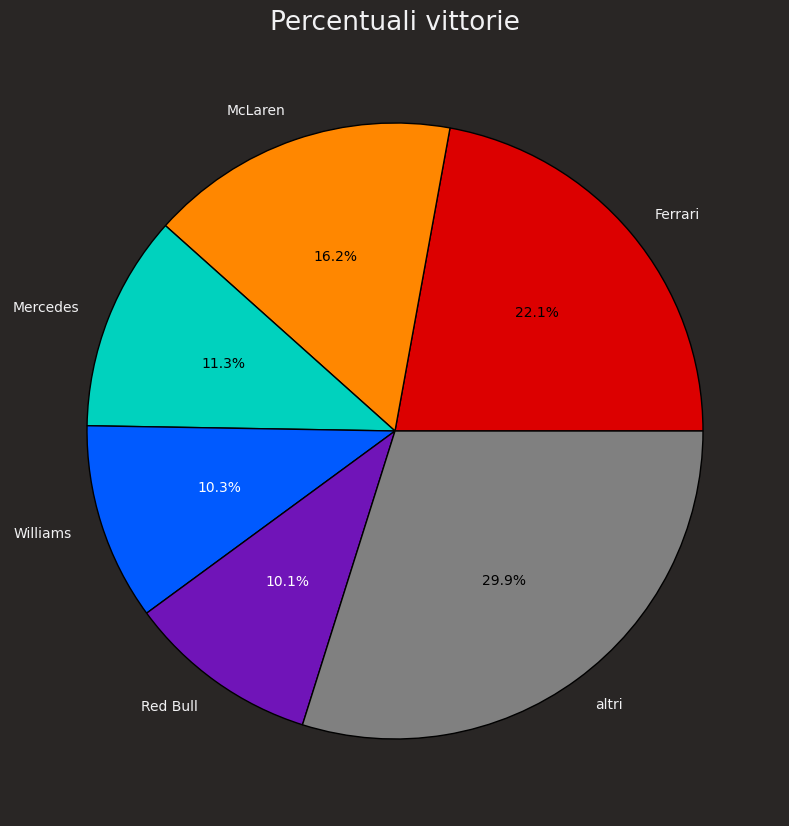

In [19]:
# Gestione Grafico
mpl.rcParams['xtick.labelsize'] = 10

vc = c_wins['name'].value_counts().head(5)
others = pd.Series(c_wins['name'].value_counts()[5:].sum(), index = ['altri'])
pie = pd.concat([vc, others])

colorStyle = [
    f1plt.team_color('Fer'), # Ferrari
    f1plt.team_color('Mcl'), # McLaren
    f1plt.team_color('Mer'),
    f1plt.team_color('Wil'),
    '#7014b8',
    'grey'
]

plt.title('Percentuali vittorie')
explode = [0.0, 0.0, 0, 0, 0, 0]
pie_wedges, texts, autotexts = plt.pie(pie, labels=pie.index, colors = colorStyle, autopct='%1.1f%%', explode = explode, wedgeprops = {'edgecolor': 'black'})
for autotext in autotexts:
    autotext.set_color('black')
autotexts[3].set_color('white')
autotexts[4].set_color('white')

### Quando hanno vinto i 5 team più vincenti?

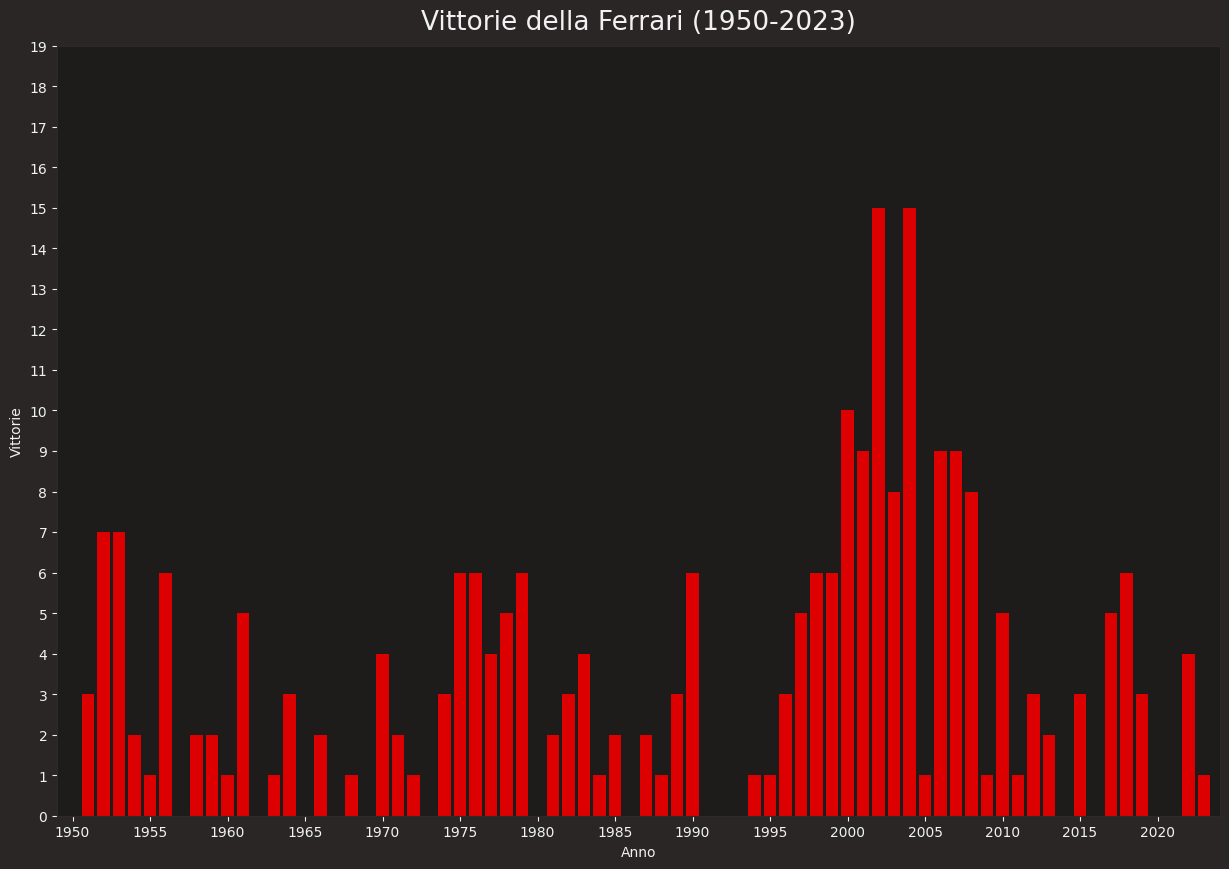

In [8]:
# Gestione Grafico
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

idTeam = 6 # Ferrari
fer_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
fer_win_count = fer_wins['year'].value_counts().reset_index()
fer_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 all'anno corrente
fer_all_years = pd.DataFrame({'year': range(1950, year+1)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
fer_win_count = fer_all_years.merge(fer_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
fer_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(fer_win_count['year'], fer_win_count['wins'], color = f1plt.team_color('FER'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(1949,year+1)
plt.xticks(np.arange(1950, year+1, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title(f'Vittorie della Ferrari (1950-{year})')
plt.show()

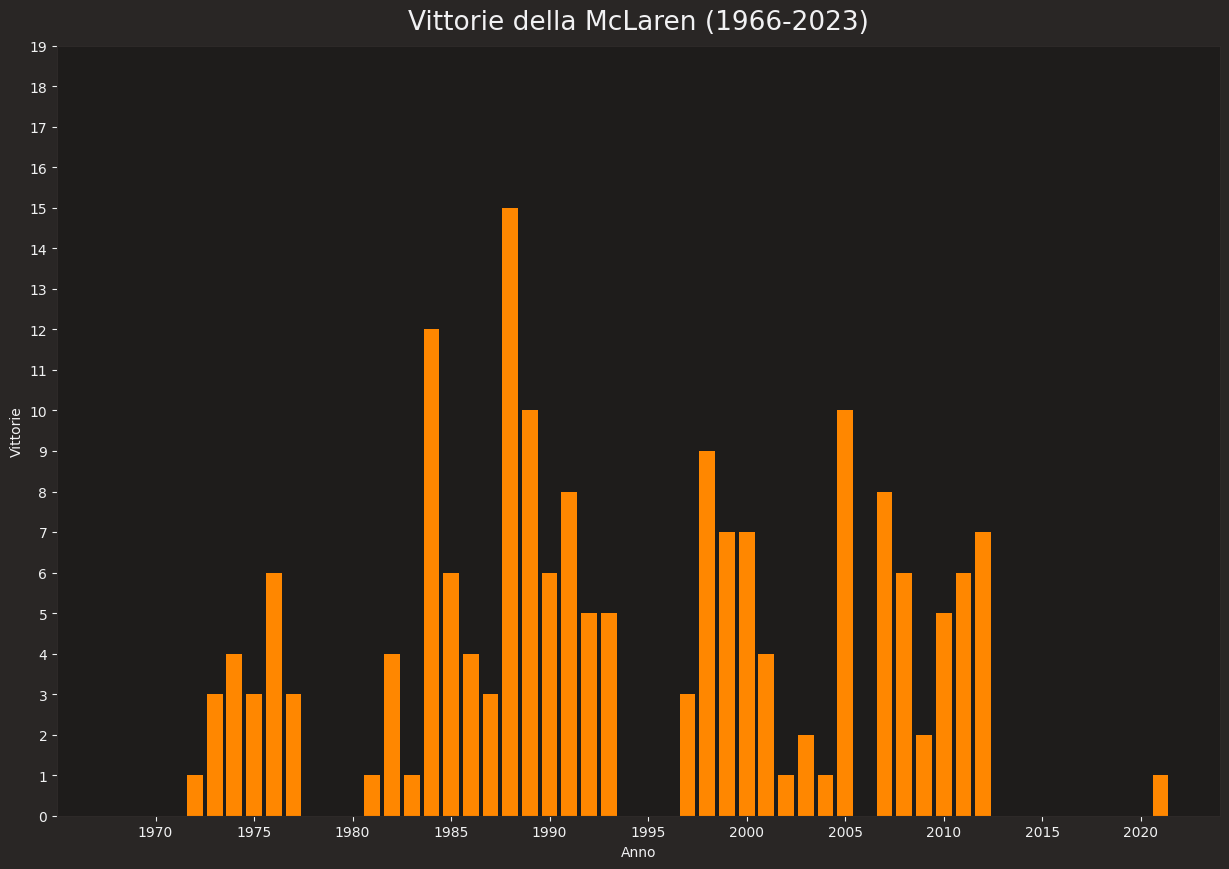

In [9]:
# Gestione Grafico
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

idTeam = 1 # McLaren
mcl_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
mcl_win_count = mcl_wins['year'].value_counts().reset_index()
mcl_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 all'anno corrente
mcl_all_years = pd.DataFrame({'year': range(1966, year+1)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
mcl_win_count = mcl_all_years.merge(mcl_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
mcl_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(mcl_win_count['year'], mcl_win_count['wins'], color = f1plt.team_color('Mcl'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(1965,year+1)
plt.xticks(np.arange(1970, year+1, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title(f'Vittorie della McLaren (1966-{year})')
plt.show()

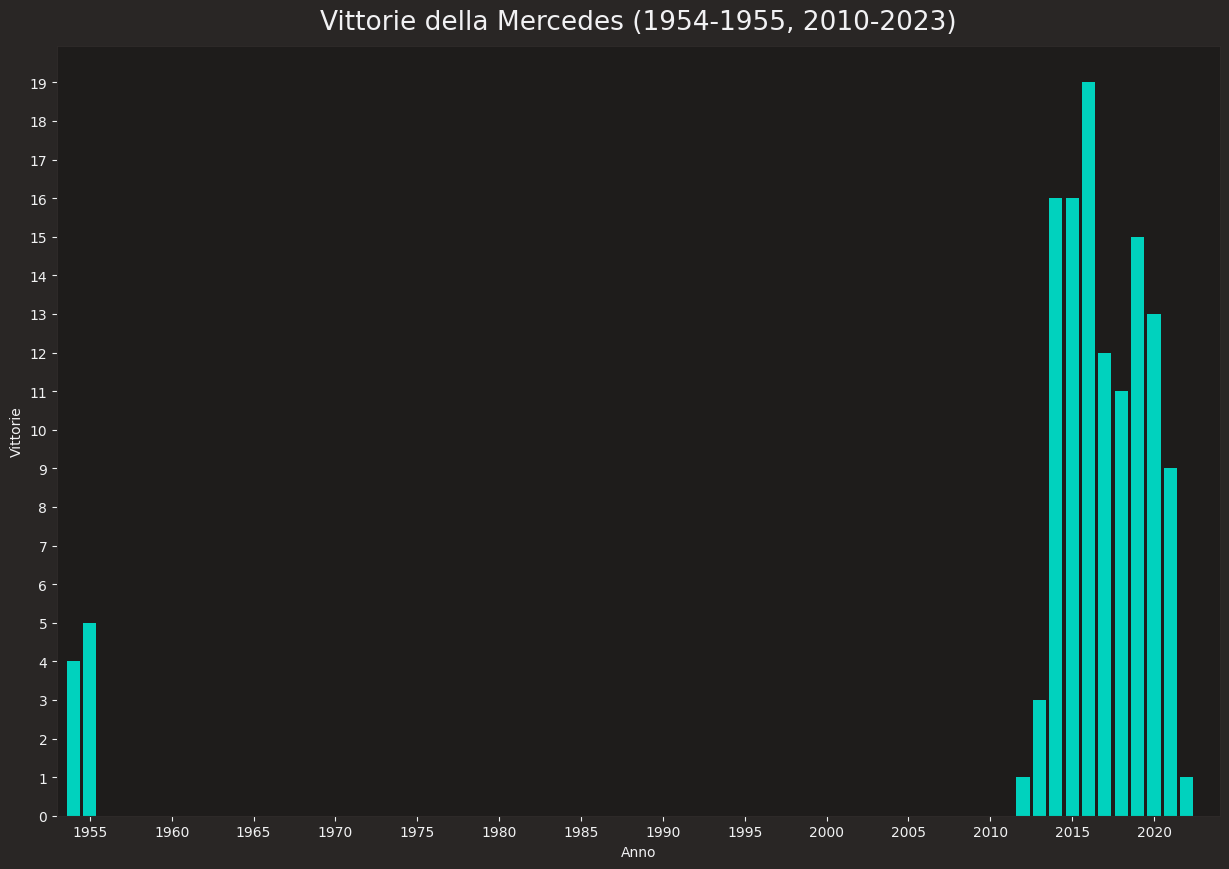

In [16]:
# Gestione Grafico
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

idTeam = 131 # Mercedes
mer_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
mer_win_count = mer_wins['year'].value_counts().reset_index()
mer_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 all'anno corrente
mer_all_years = pd.DataFrame({'year': range(1954, year+1)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
mer_win_count = mer_all_years.merge(mer_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
mer_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(mer_win_count['year'], mer_win_count['wins'], color = f1plt.team_color('Mer'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(1953,year+1)
plt.xticks(np.arange(1955, year+1, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title(f'Vittorie della Mercedes (1954-1955, 2010-{year})')
plt.show()

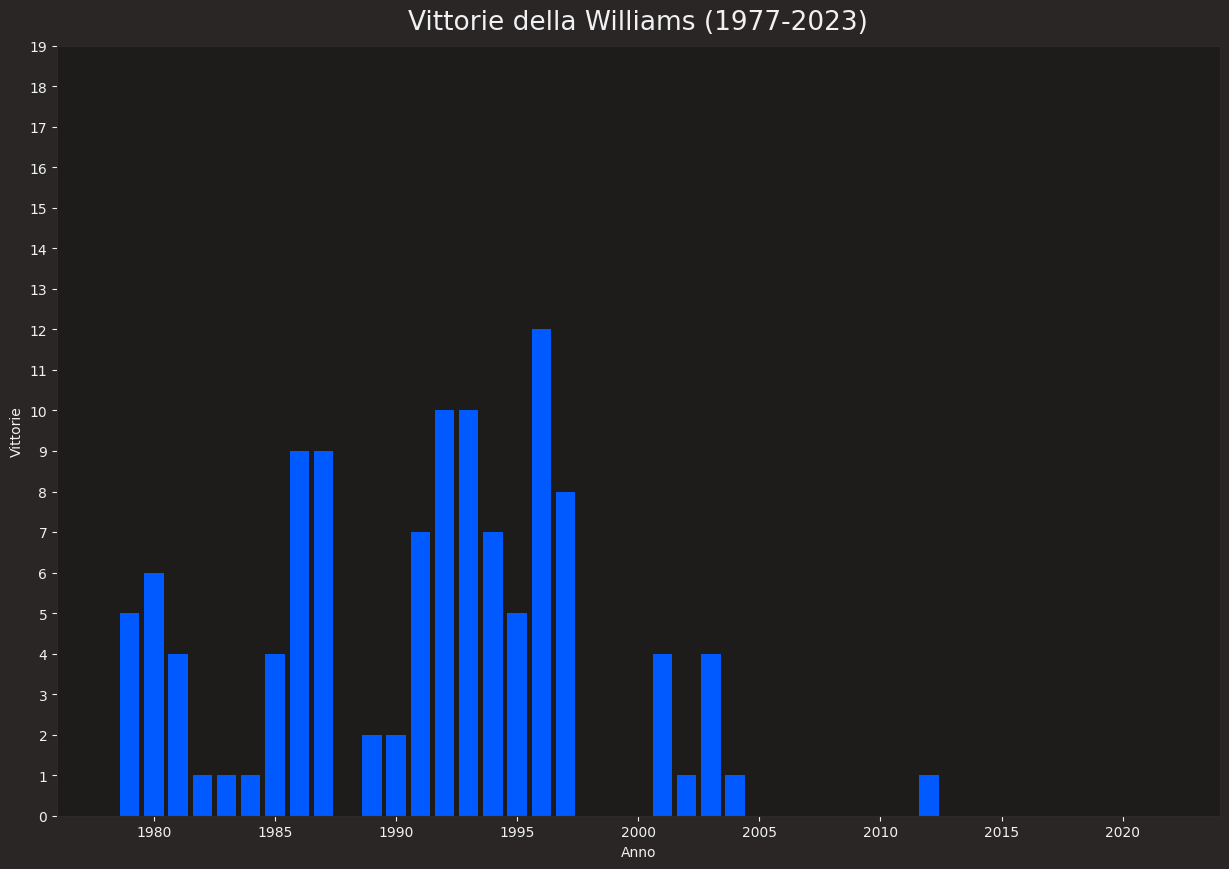

In [11]:
# Gestione Grafico
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

idTeam = 3 # Williams
wil_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
wil_win_count = wil_wins['year'].value_counts().reset_index()
wil_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 all'anno corrente
wil_all_years = pd.DataFrame({'year': range(1977, year+1)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
wil_win_count = wil_all_years.merge(wil_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
wil_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(wil_win_count['year'], wil_win_count['wins'], color = f1plt.team_color('Wil'))
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(1976,year+1)
plt.xticks(np.arange(1980, year+1, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title(f'Vittorie della Williams (1977-{year})')
plt.show()

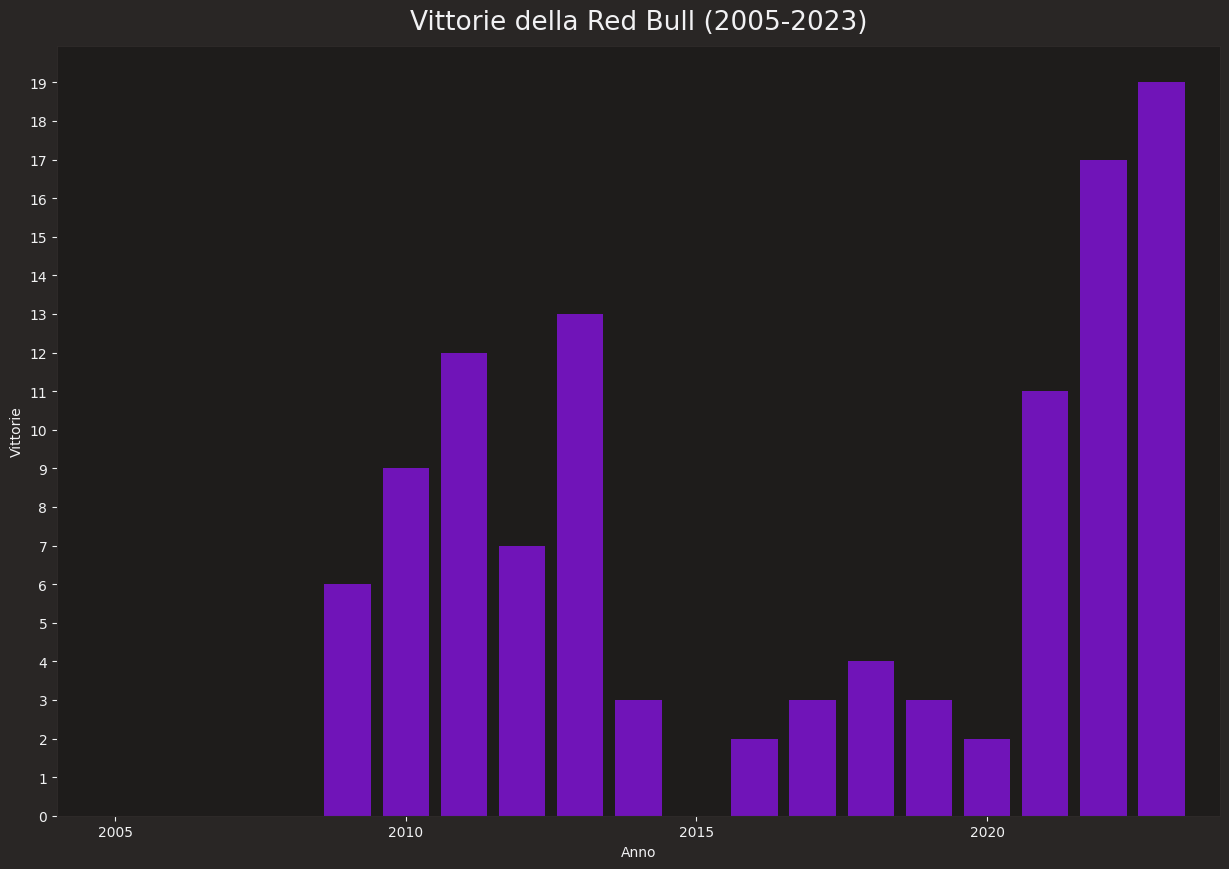

In [18]:
# Gestione Grafico
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

idTeam = 9 # Red Bull
rbr_wins = results[(results['constructorId'] == idTeam) & (results['positionOrder'] == 1)].merge(races, on = 'raceId')

# Calcola il conteggio delle vittorie per ogni anno
rbr_win_count = rbr_wins['year'].value_counts().reset_index()
rbr_win_count.columns = ['year', 'wins']

# Crea un DataFrame con tutti gli anni dal 1950 all'anno corrente
rbr_all_years = pd.DataFrame({'year': range(2005, year+1)})

# Fai il merge per assicurarti di avere tutte le etichette degli anni
rbr_win_count = rbr_all_years.merge(rbr_win_count, on='year', how='left')

# Riempi i valori mancanti (quelli con 0 vittorie) con 0
rbr_win_count['wins'].fillna(0, inplace=True)

# Ora puoi creare il grafico
plt.bar(rbr_win_count['year'], rbr_win_count['wins'], color = '#7014b8')
plt.xlabel('Anno')
plt.ylabel('Vittorie')
plt.xlim(2004, year+1)
plt.xticks(np.arange(2005, year+1, step=5))
plt.yticks(np.arange(0, 20, step=1))
plt.title(f'Vittorie della Red Bull (2005-{year})')
plt.show()

### Com'è messa la distribuzione delle vittorie dei primi 5 team?

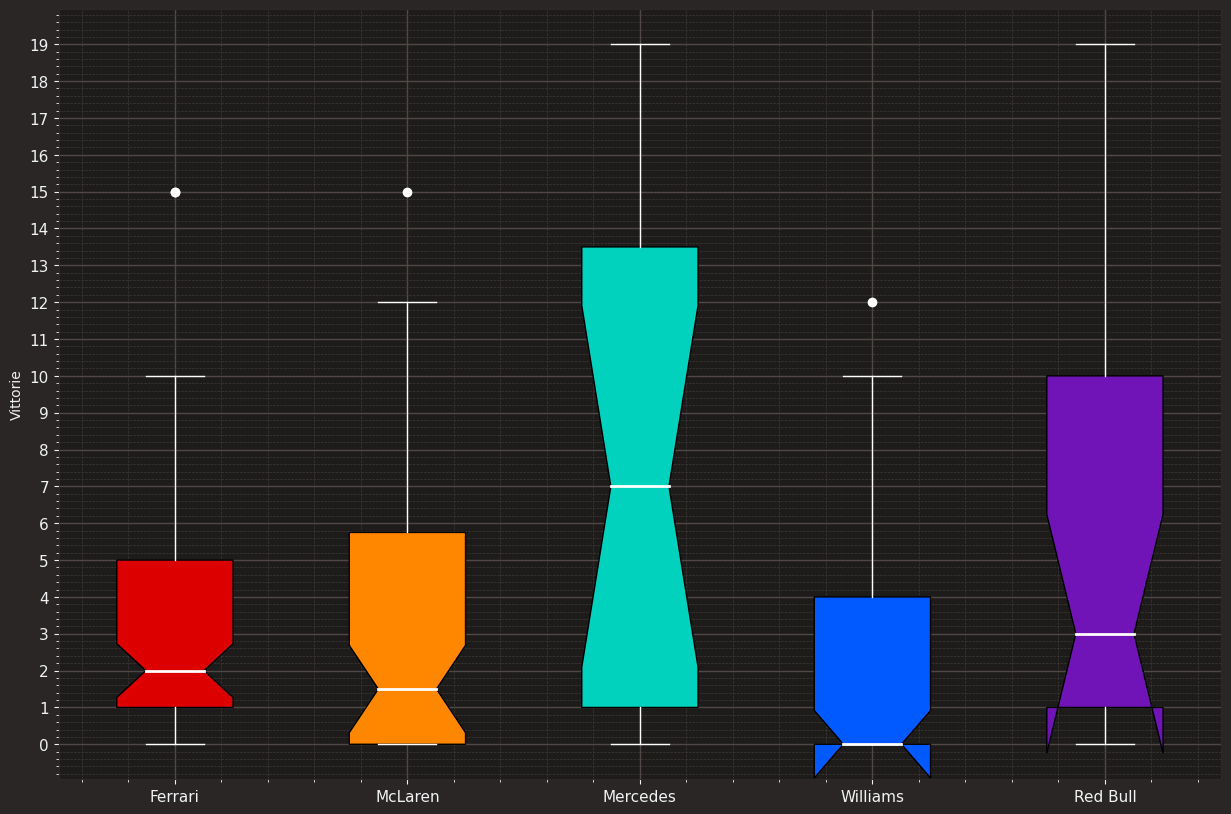

In [22]:
# Gestione Grafico
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11

# I colori dei team
colors = {
    'Ferrari': f1plt.team_color('Ferrari'),
    'McLaren': f1plt.team_color('McLaren'),
    'Mercedes': f1plt.team_color('Mercedes'),
    'Williams': f1plt.team_color('Williams'),
    'Red Bull': '#7014b8'
}

# Dati dei boxplot
boxplot = [
    fer_win_count['wins'],
    mcl_win_count['wins'],
    pd.concat([mer_win_count['wins'][:1954-1953+1], mer_win_count['wins'][2010-year-1:]]),
    wil_win_count['wins'],
    rbr_win_count['wins']
]

# Etichette dei team
labels = [
    'Ferrari',
    'McLaren',
    'Mercedes',
    'Williams',
    'Red Bull'
]

fig, ax = plt.subplots(figsize=(15, 10))

# Creazione dei boxplot
bplot = ax.boxplot(boxplot, patch_artist=True, notch=True)

# Colore dei boxplot
for patch, color in zip(bplot['boxes'], [colors[label] for label in labels]):
    patch.set_facecolor(color)

# Stanghette bianche
for median in bplot['medians']:
    median.set_color('white')
    median.set_linewidth(2)    

# Outliers bianchi
for flier in bplot['fliers']:
    flier.set(marker='o', color='white', markerfacecolor='white', markeredgecolor='white')

# Bastoncini bianchi
for whisker in bplot['whiskers']:
    whisker.set(color='white')

# Range interquartile bianco
for cap in bplot['caps']:
    cap.set(color='white')
    
# Etichette sugli assi x
ax.set_xticklabels(labels)
plt.yticks(np.arange(0, 20, step=1))
plt.ylabel('Vittorie')

plt.show()